In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2

In [124]:
import matplotlib
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)

In [125]:
df = pd.read_excel('data/rpsp1.xlsx', sheet_name='Sheet1')
df.head()

,choice,Gender,Income,Driving-years,Purpose,Duration,Fee,Walking-distance,Rent-or-not,Parking-time-limited,Information of free parking is not released timely,Vehicle-safety,Others,total
0,normal parking slot,2,3,1,3,3,2,1,1,3,2,4,2,11
1,shared parking slot,2,4,2,1,4,3,2,2,3,4,3,3,13
2,normal parking slot,2,4,1,1,3,3,1,1,3,4,4,3,14
3,shared parking slot,2,2,1,1,1,2,2,3,4,4,3,2,13
4,shared parking slot,1,2,1,3,4,4,2,1,3,2,2,1,8


In [126]:
dummies = pd.get_dummies(df['choice'], prefix='choice', drop_first=False)
df = pd.concat([df, dummies], axis=1)
df = df.drop(['choice'], axis=1)
df_y = df['choice_shared parking slot'].copy()
df = df.drop(['choice_normal parking slot','choice_shared parking slot'], axis =1)


In [128]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
scaled_array = mm_scaler.fit_transform(df)
df = pd.DataFrame(scaled_array,columns=df.columns)

In [129]:
df.insert(0, 'choice_shared parking slot', df_y, True) 
df

,choice_shared parking slot,Gender,Income,Driving-years,Purpose,Duration,Fee,Walking-distance,Rent-or-not,Parking-time-limited,Information of free parking is not released timely,Vehicle-safety,Others,total
0,0,1.0,0.50,0.0,0.50,0.50,0.25,0.000000,0.0,0.666667,0.333333,1.000000,0.333333,0.636364
1,1,1.0,0.75,0.5,0.00,0.75,0.50,0.333333,0.5,0.666667,1.000000,0.666667,0.666667,0.818182
2,0,1.0,0.75,0.0,0.00,0.50,0.50,0.000000,0.0,0.666667,1.000000,1.000000,0.666667,0.909091
3,1,1.0,0.25,0.0,0.00,0.00,0.25,0.333333,1.0,1.000000,1.000000,0.666667,0.333333,0.818182
4,1,0.0,0.25,0.0,0.50,0.75,0.75,0.333333,0.0,0.666667,0.333333,0.333333,0.000000,0.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0,0.0,0.00,0.5,0.00,0.00,0.75,0.333333,0.0,0.333333,1.000000,0.666667,0.333333,0.636364
244,1,1.0,0.50,0.0,0.50,0.50,0.75,0.333333,1.0,0.333333,0.333333,0.666667,0.666667,0.545455
245,1,0.0,0.25,0.0,0.50,0.50,0.75,0.000000,0.0,1.000000,0.333333,0.000000,0.000000,0.363636
246,0,1.0,0.50,0.0,0.75,0.25,0.75,0.333333,0.0,0.666667,0.666667,0.666667,0.333333,0.636364


In [130]:
X = df.drop(['choice_shared parking slot'],axis=1)
y = df[['choice_shared parking slot']].copy()

In [131]:
y.head()

,choice_shared parking slot
0,0
1,1
2,0
3,1
4,1


In [132]:
X.head()

,Gender,Income,Driving-years,Purpose,Duration,Fee,Walking-distance,Rent-or-not,Parking-time-limited,Information of free parking is not released timely,Vehicle-safety,Others,total
0,1.0,0.50,0.0,0.5,0.50,0.25,0.000000,0.0,0.666667,0.333333,1.000000,0.333333,0.636364
1,1.0,0.75,0.5,0.0,0.75,0.50,0.333333,0.5,0.666667,1.000000,0.666667,0.666667,0.818182
2,1.0,0.75,0.0,0.0,0.50,0.50,0.000000,0.0,0.666667,1.000000,1.000000,0.666667,0.909091
3,1.0,0.25,0.0,0.0,0.00,0.25,0.333333,1.0,1.000000,1.000000,0.666667,0.333333,0.818182
4,0.0,0.25,0.0,0.5,0.75,0.75,0.333333,0.0,0.666667,0.333333,0.333333,0.000000,0.363636


# Recursive Feature Elimination

In [133]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

y1 = np.array(y)
y1 = y1.reshape(y1.shape[0])
y1.shape

rfe = RFE(logreg, 5)
rfe = rfe.fit(X,y1)
print(rfe.support_)
print(rfe.ranking_)

for i,bol in enumerate(rfe.support_):
    if bol:
        print(X.columns[i])

[False False False  True  True False  True False  True False  True False
 False]
[4 6 5 1 1 9 1 7 1 3 1 2 8]
Purpose
Duration
Walking-distance
Parking-time-limited
Vehicle-safety


# Result of RFE
## From the above results the selected column are:
<br>
<ul>
<li>Purpose</li>
<li>Duration</li>
<li>Walking-distance</li>
<li>Parking-time-limited</li>
    <li>Vehicle-safety
</li>
</ul>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


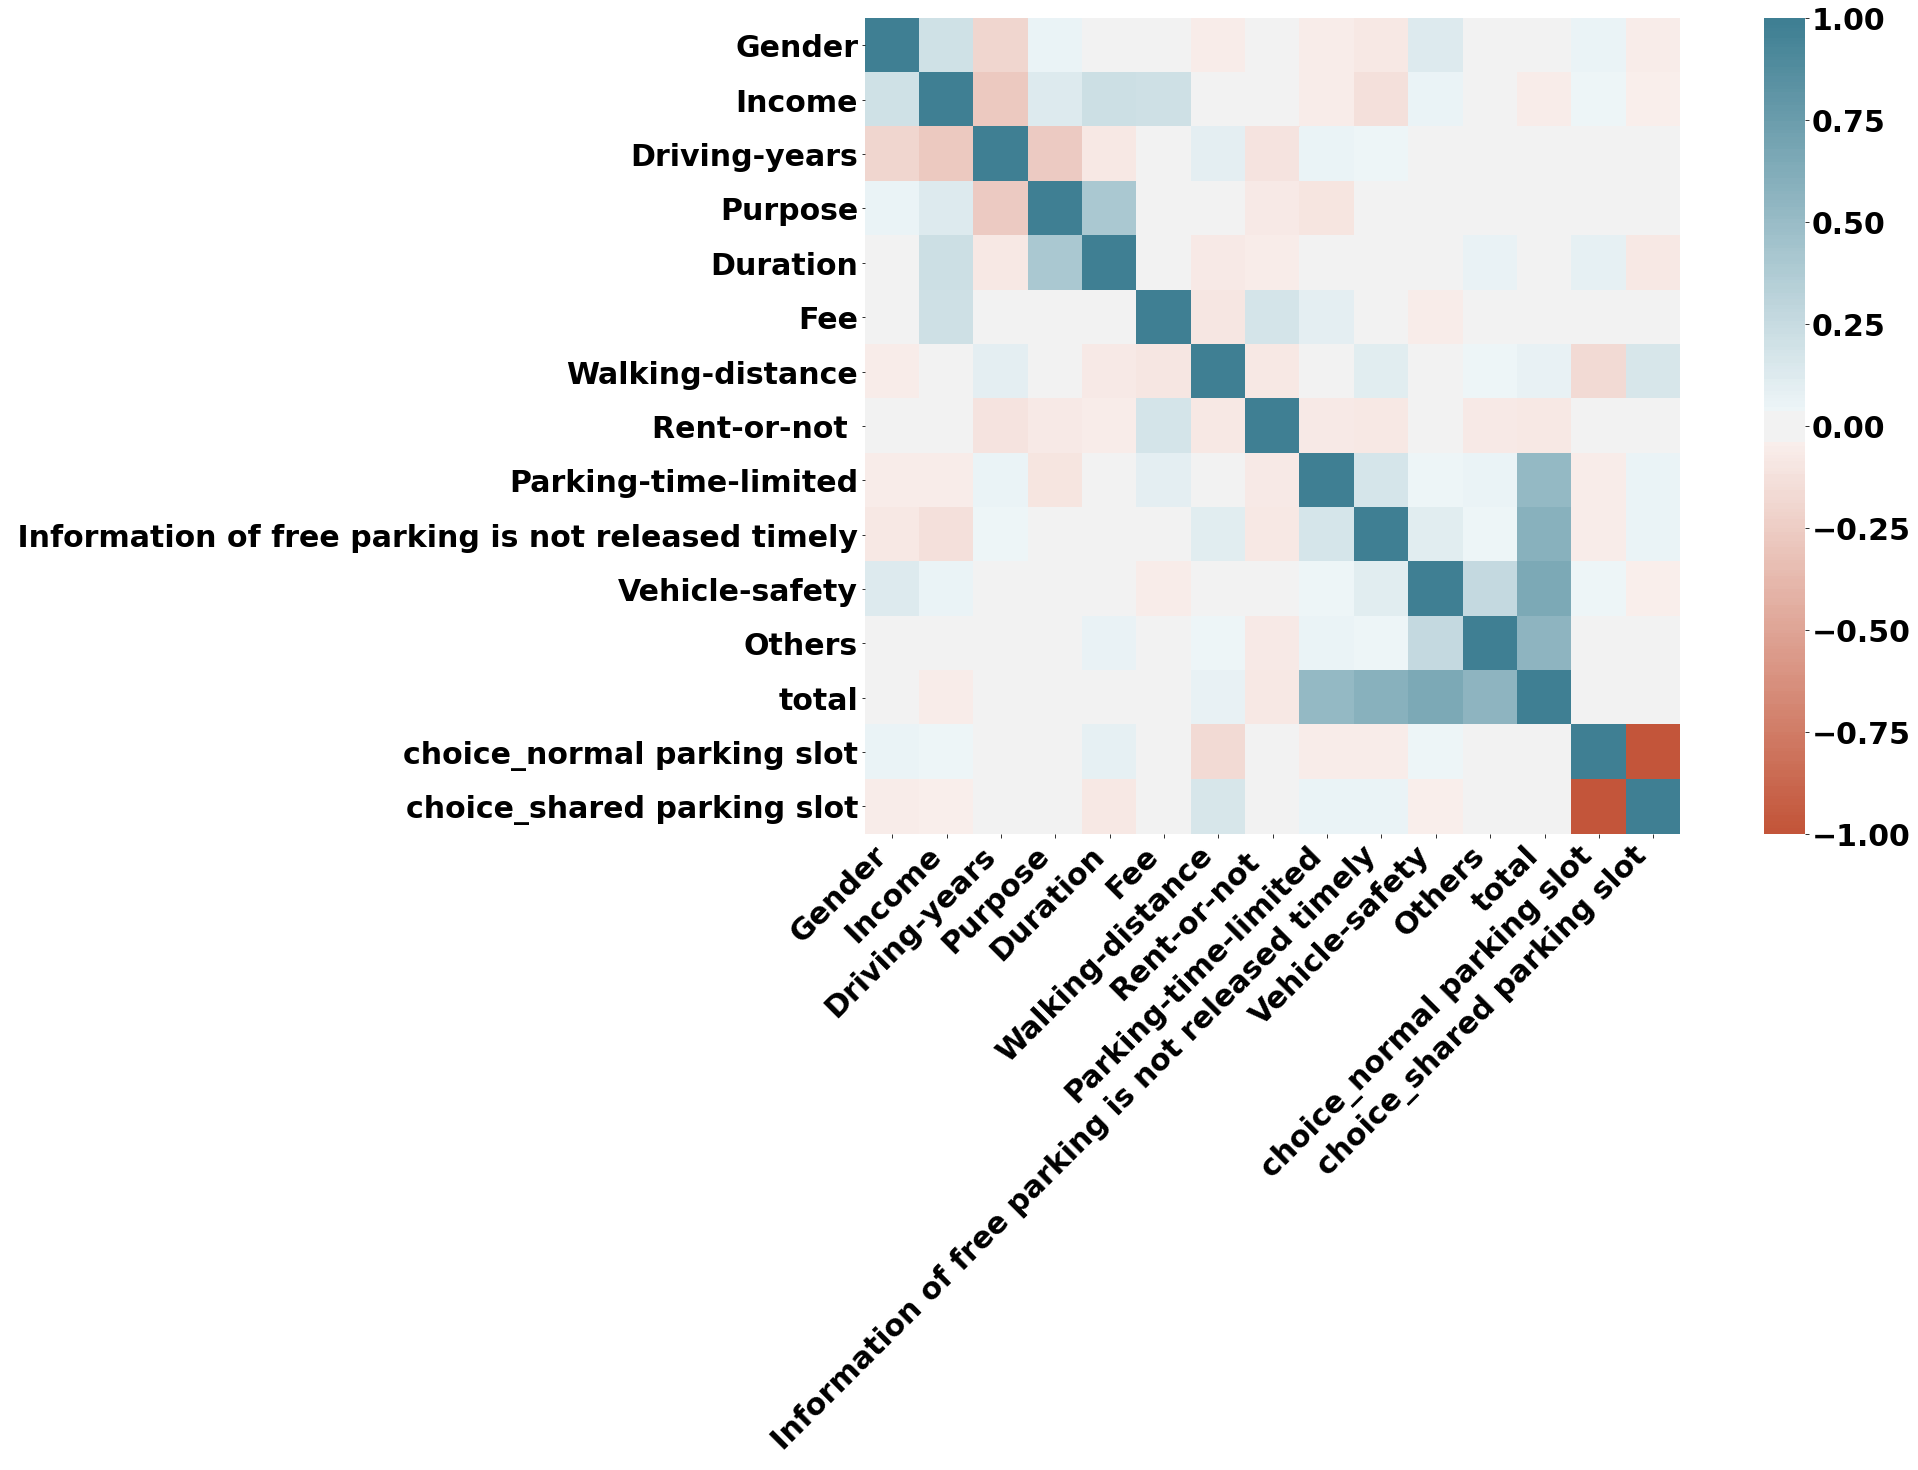

In [15]:
plt.figure(figsize=(30, 15))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig("heatmap.jpg")

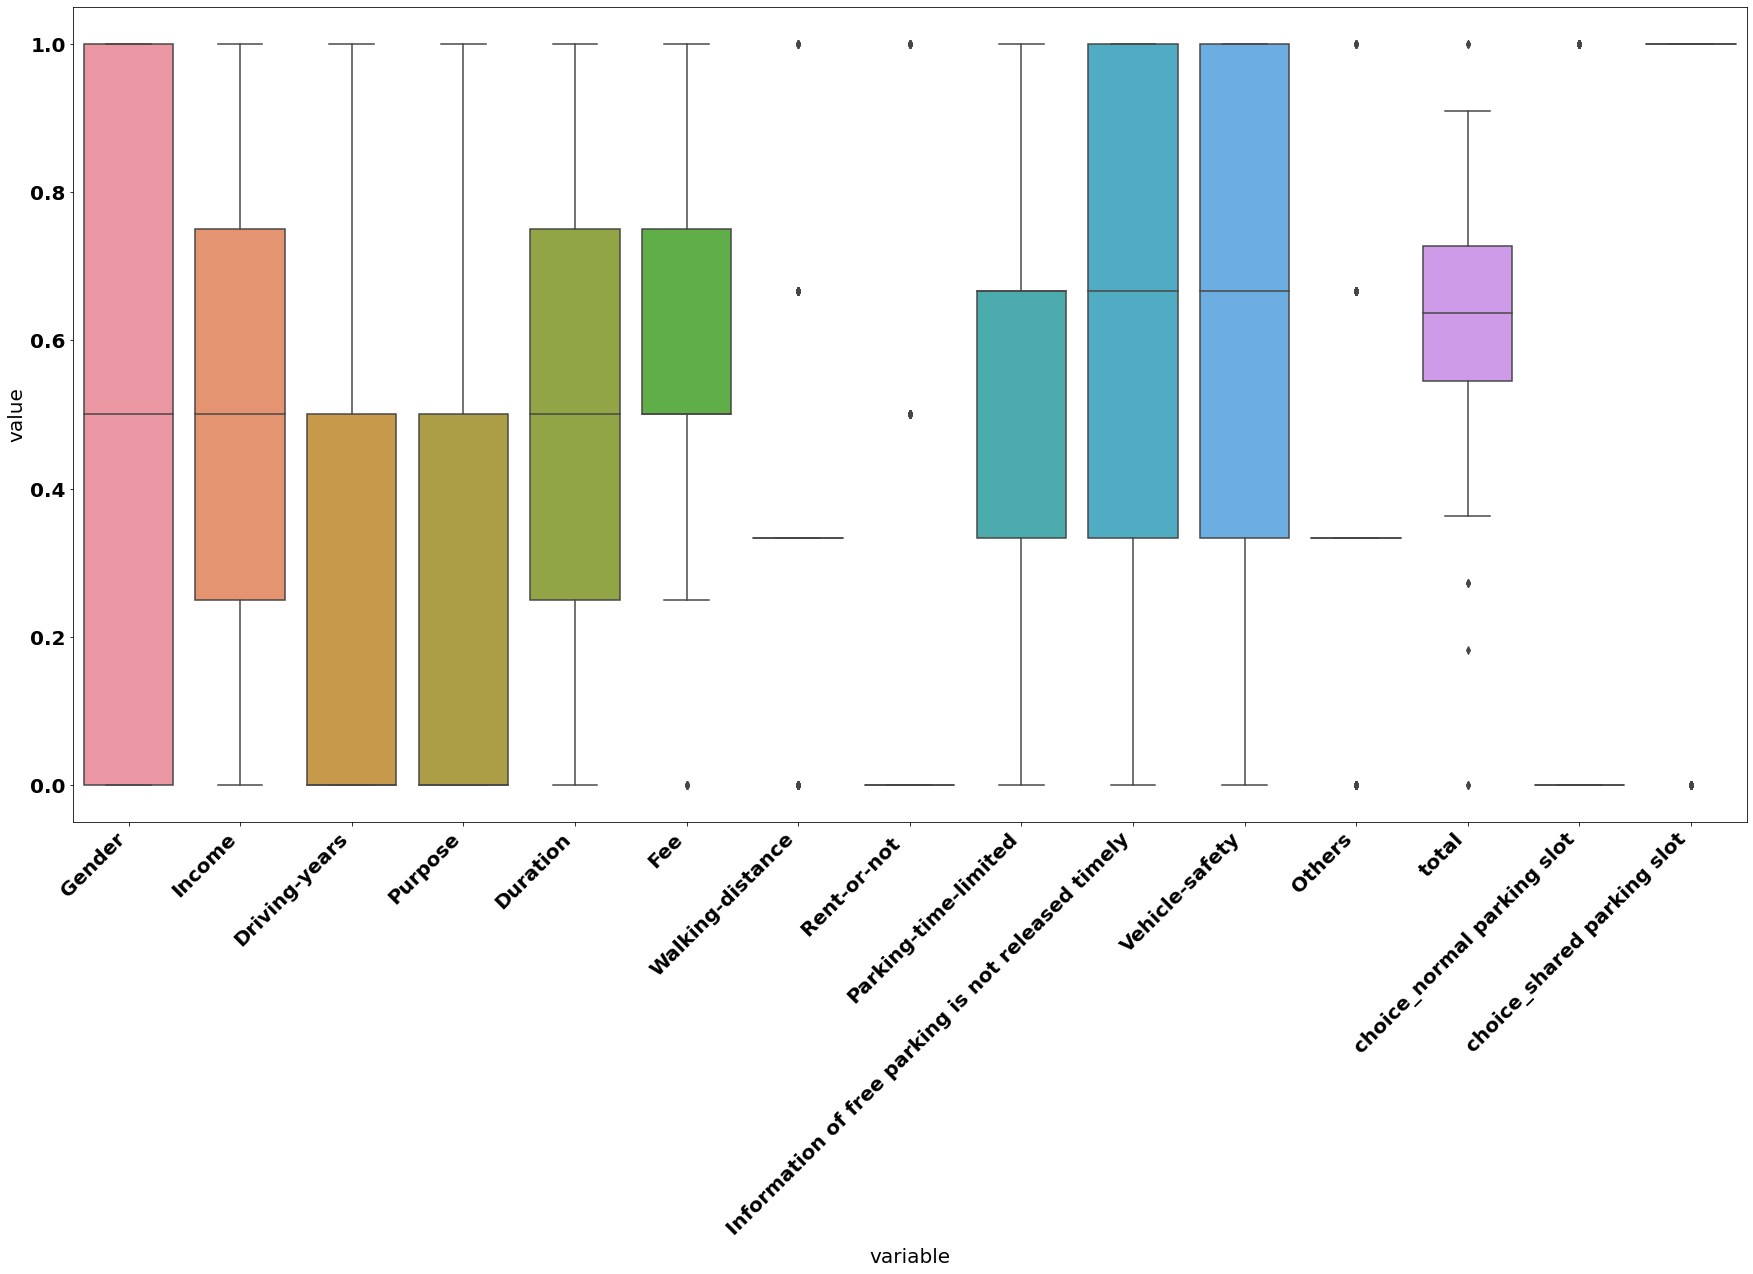

In [22]:
plt.figure(figsize=(30, 15))
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.savefig('combine_boxplot_without_time.jpg')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.show()

<Figure size 2160x1080 with 0 Axes>

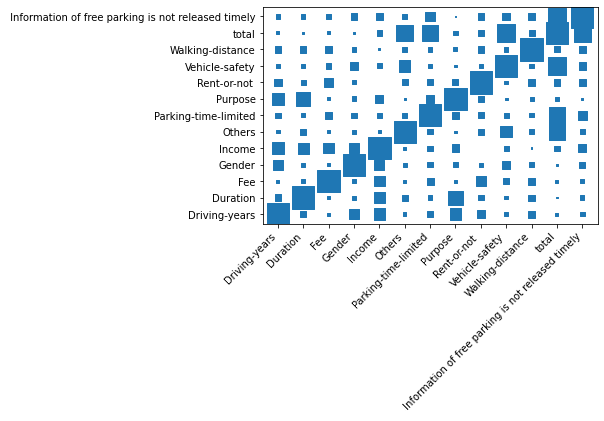

In [51]:
# Step 1 - Make a scatter plot with square markers, set column names as labels
plt.figure(figsize=(30, 15))
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
corr = df.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)
plt.savefig("box_heatmap.png")

# Spearman's Rank Correlation
## Not beneficial , coefficiants are too small

In [134]:
corr = df.corr(method='spearman')
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']

table = pd.pivot_table(corr, values='value', index=['x'],
                    columns=['y'], aggfunc=np.sum)

In [135]:
spearman_coeff = table[['choice_shared parking slot']]
spearman_coeff = pd.DataFrame(spearman_coeff['choice_shared parking slot'])
spearman_coeff.iloc[:,0].abs().nlargest(7)

x
choice_shared parking slot    1.000000
Walking-distance              0.162607
Duration                      0.083226
Parking-time-limited          0.059089
Vehicle-safety                0.051446
Gender                        0.051443
Income                        0.048638
Name: choice_shared parking slot, dtype: float64

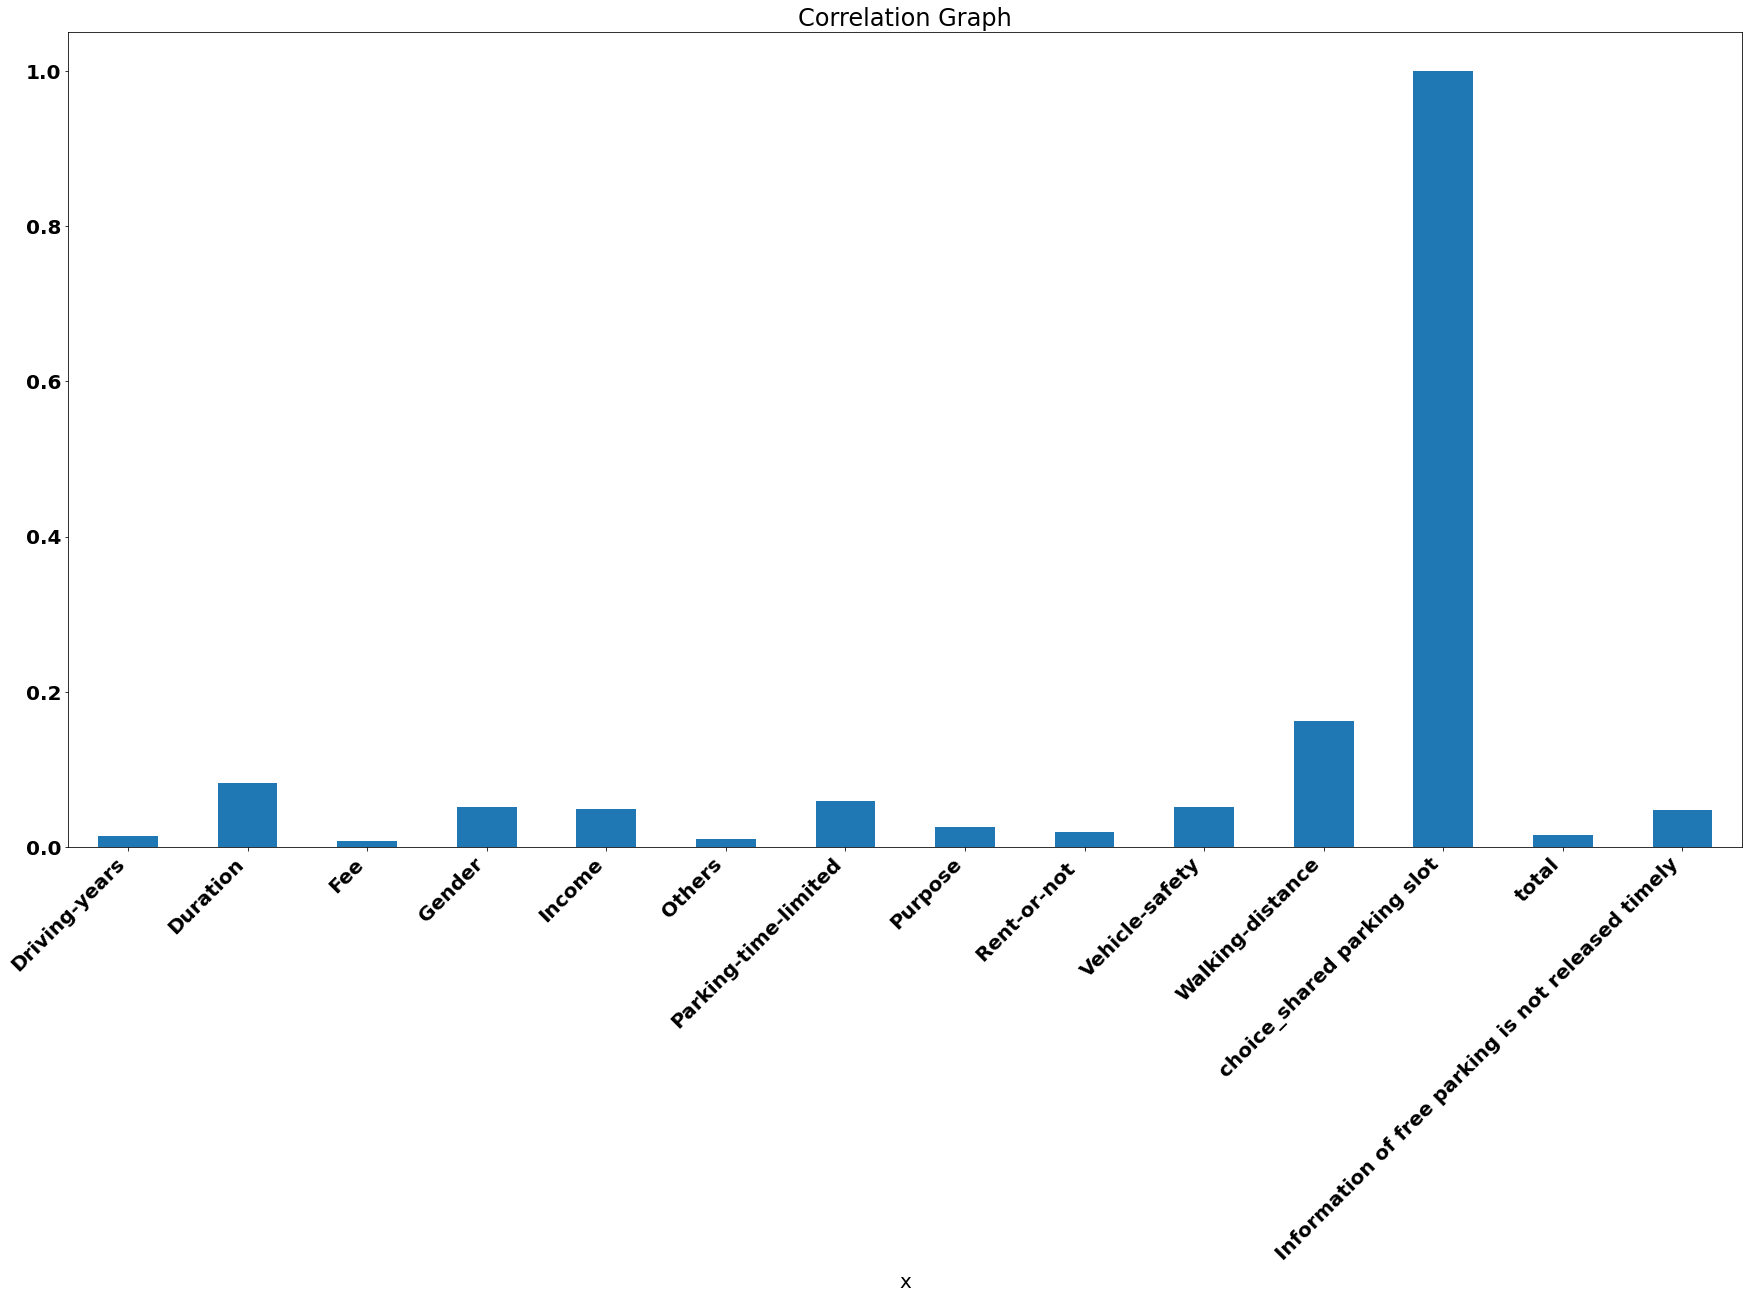

In [136]:
plt.figure(figsize=(30, 15))
plt.title("Correlation Graph")
corr = df.corr()
ax = spearman_coeff.iloc[:,0].abs().plot.bar(x='lab', y='val', rot=0)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig("heatmap.jpg")


# Result of Spearman 
## the co-efficients are very low but the variables with largest correlation are
<br>
<ul>
<li>Walking-distance</li>
<li>Duration</li>
<li>Parking-time-limited</li>
<li>Vehicle-safety</li>
    <li>Gender</li>
</ul>

# Chi-Square Test

In [137]:
def check_categorical_dependency(crosstab_table, confidence_interval):
    stat, p, dof, expected = stats.chi2_contingency(crosstab_table)
    print ("Chi-Square Statistic value = {}".format(stat))
    print ("P - Value = {}".format(p))
    alpha = 1.0 - confidence_interval
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    return expected

In [138]:
cross_tables = []
for i in X.columns:
    print(i)
    cross_table = pd.crosstab(df[i], df['choice_shared parking slot'], 
                                      margins=True)
    
    print("--- CROSS TABLE ----")
    print(cross_table)
    cross_tables.append({
        "col":i,
        "table":cross_table
    })
    
    print("--- Chi Square Results")
    check_categorical_dependency(cross_table, 0.8)
    print("\n")

Gender
--- CROSS TABLE ----
choice_shared parking slot   0    1  All
Gender                                  
0.0                         21  103  124
1.0                         26   98  124
All                         47  201  248
--- Chi Square Results
Chi-Square Statistic value = 0.6562930030697576
P - Value = 0.9566074697279146
Independent (fail to reject H0)


Income
--- CROSS TABLE ----
choice_shared parking slot   0    1  All
Income                                  
0.0                          6   30   36
0.25                         8   51   59
0.5                         20   64   84
0.75                         9   40   49
1.0                          4   16   20
All                         47  201  248
--- Chi Square Results
Chi-Square Statistic value = 2.5550409036775052
P - Value = 0.9900491331960529
Independent (fail to reject H0)


Driving-years
--- CROSS TABLE ----
choice_shared parking slot   0    1  All
Driving-years                           
0.0                   

# Feature Selection using Chi-Square

In [139]:
X_new = SelectKBest(chi2, k=4).fit_transform(X, y)

In [140]:
X_new.shape

(248, 4)

In [141]:

for i in range(0,X_new.shape[1]):
    print("\n")
    print(pd.crosstab(np.squeeze(X_new[:,i]), np.squeeze(y)))

    print("\n")



choice_shared parking slot   0    1
row_0                              
0.0                         21  103
1.0                         26   98




choice_shared parking slot   0   1
row_0                             
0.00                         6  30
0.25                         8  51
0.50                        20  64
0.75                         9  40
1.00                         4  16




choice_shared parking slot   0   1
row_0                             
0.00                         5  49
0.25                         8  32
0.50                        19  62
0.75                        15  49
1.00                         0   9




choice_shared parking slot   0    1
row_0                              
0.000000                    15   45
0.333333                    30  112
0.666667                     2   33
1.000000                     0   11




## So from the above results the Selected Column are:
<br>
<ul>
<li>Income</li>
<li>Duration</li>
<li>Walking-distance</li>
<li>Information of free parking is not released timely</li>
</ul>